In [230]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from functools import reduce
import matplotlib.ticker as ticker
import seaborn as sns
from urllib.request import urlopen
import json
import plotly.express as px


df = pd.read_csv('/Users/pbunyasr/Desktop/GWU_Data/Project/Market_adjustment-/kc_house_data_revised_5.20.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,0,1955,No,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,Yes,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,0,1933,No,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,No,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,0,1987,No,98074,47.6168,-122.045,1800,7503


In [231]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=1)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))


Average Price for Test Data: 549019.395
Intercept: -30473.498566896887
Coefficient: [274.00455439]


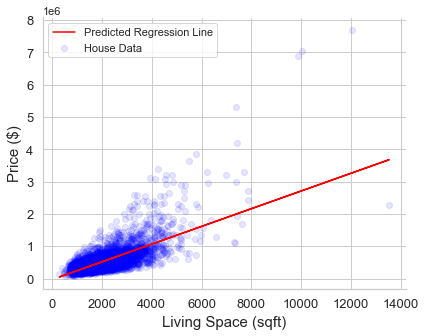

In [232]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='blue',label="House Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


In [233]:
df = pd.read_csv('/Users/pbunyasr/Desktop/GWU_Data/Project/Market_adjustment-/kc_house_data_revised_5.20.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,0,1955,No,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,Yes,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,0,1933,No,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,No,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,0,1987,No,98074,47.6168,-122.045,1800,7503


In [234]:
X = df.iloc[:,3:].values
Y = df['price'].values

In [235]:
X

array([[3, 1.0, 1180, ..., -122.257, 1340, 5650],
       [3, 2.25, 2570, ..., -122.319, 1690, 7639],
       [2, 1.0, 770, ..., -122.233, 2720, 8062],
       ...,
       [2, 0.75, 1020, ..., -122.299, 1020, 2007],
       [3, 2.5, 1600, ..., -122.069, 1410, 1287],
       [2, 0.75, 1020, ..., -122.299, 1020, 1357]], dtype=object)

In [236]:
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [237]:
le = LabelEncoder()
X[:,5] = le.fit_transform(X[:,5])
X[:,12] = le.fit_transform(X[:,12])

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [239]:
LR = LinearRegression()

In [240]:
LR.fit(X_train,Y_train)

LinearRegression()

In [241]:
Y_prediction = LR.predict(X_test)
Y_prediction

array([ 640243.59683825,  476673.38569212,  707876.23470166, ...,
        360598.14554431, 1387635.35318315,  367814.74511884])

In [242]:
score = r2_score(y_test,Y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is =",mean_squared_error(Y_test,Y_prediction))
print("root_mean_squared error of is =",np.sqrt(mean_squared_error(Y_test,Y_prediction)))

r2 score is 0.6859461215743862
mean_sqrd_error is = 54267523783.34088
root_mean_squared error of is = 232953.909139428


In [243]:
df_new = pd.read_csv('/Users/pbunyasr/Desktop/GWU_Data/Project/Market_adjustment-/kc_house_data_revised_5.20.csv')
df_new.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,No,0,...,7,1180,0,1955,No,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,No,0,...,7,2170,400,1951,Yes,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,No,0,...,6,770,0,1933,No,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,No,0,...,7,1050,910,1965,No,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,No,0,...,8,1680,0,1987,No,98074,47.6168,-122.045,1800,7503


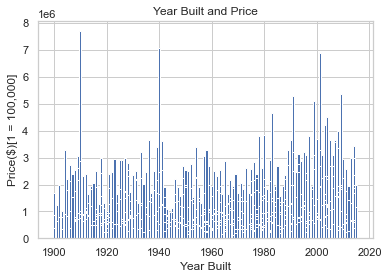

In [254]:
plt.bar(df_new['yr_built'], df_new['price'])
plt.title('Year Built and Price')
plt.xlabel('Year Built')
plt.ylabel('Price($)[1 = 100,000]')
plt.show()

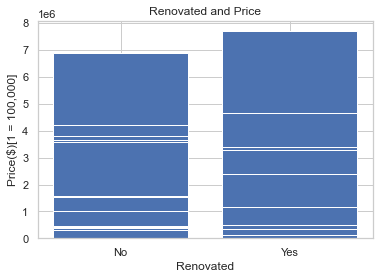

In [255]:
plt.bar(df_new['renovated'], df_new['price'])
plt.title('Renovated and Price')
plt.xlabel('Renovated')
plt.ylabel('Price($)[1 = 100,000]')
plt.show()